ROOT Keys: ['DF_2365371852339552;1', 'DF_2365371852339552/O2hfcandb0dstar;1', 'DF_2365371852339552/O2hfmlb0;1', 'DF_2365371852339552/O2hfredb0dpml;1', 'DF_2365371852339552/O2hfredb0mccheck;1', 'DF_2365371852339552/O2hfredb0prongdst;1', 'DF_2365371852339552/O2hfredcandb0lite;1', 'DF_2365371852339552/O2hfselb0;1', 'parentFiles;1']
No keys found for table: O2hfcandb0base
No keys found for table: O2hfredb0prong
Reading DF_2365371852339552/O2hfredb0prongdst;1

Table: O2hfredb0prongdst
Number of entries: 5
Columns: ['fIndexHfRed2Prongs_0', 'fIndexHfRedTrackBases_1', 'fIndexHfRedSoftPiBases_2']
Plotting fIndexHfRed2Prongs_0
Plotting fIndexHfRedTrackBases_1
Plotting fIndexHfRedSoftPiBases_2


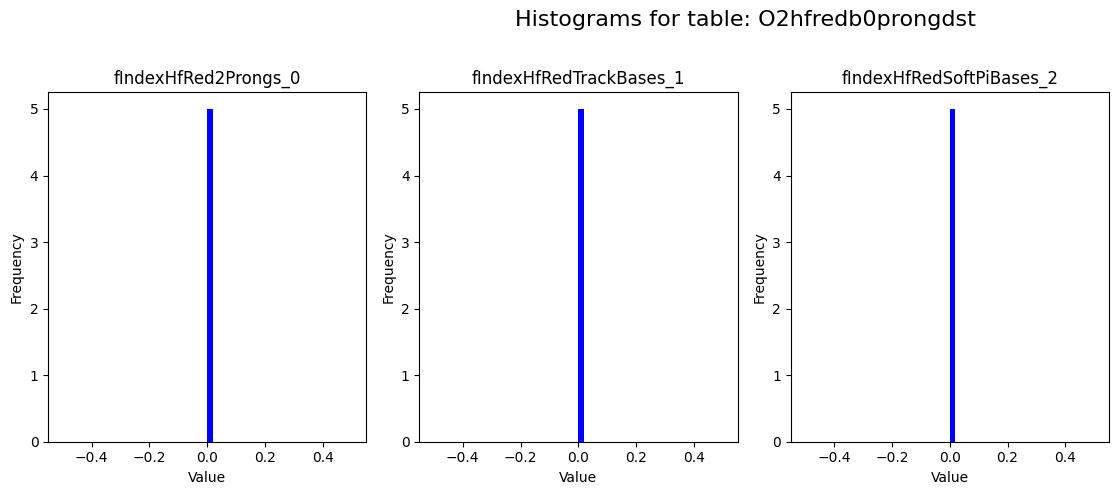

No keys found for table: O2hfredb0softpi
Reading DF_2365371852339552/O2hfredb0dpml;1

Table: O2hfredb0dpml
Number of entries: 5
Columns: ['fProng0MlScoreBkg', 'fProng0MlScorePrompt', 'fProng0MlScoreNonprompt']
Plotting fProng0MlScoreBkg
Plotting fProng0MlScorePrompt
Plotting fProng0MlScoreNonprompt


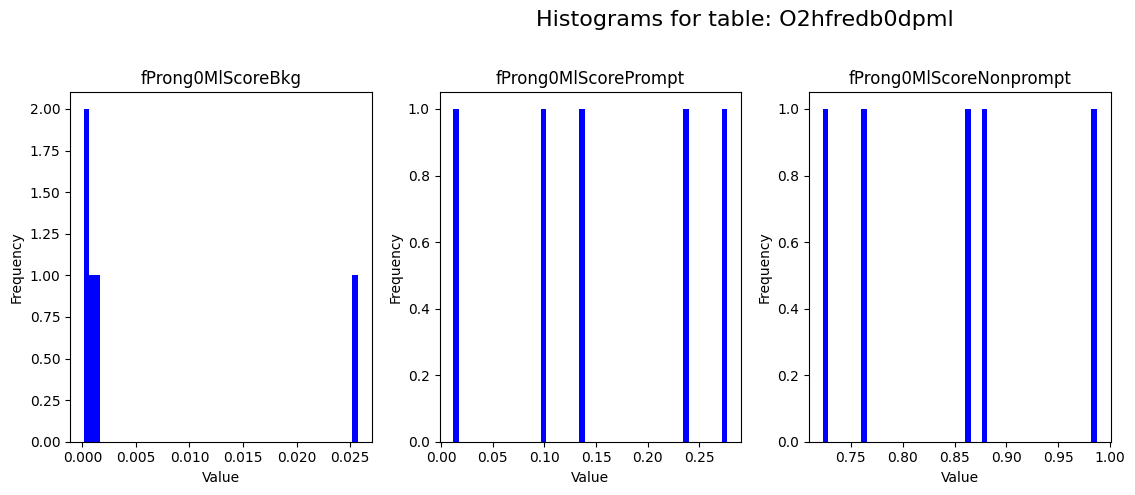

Reading DF_2365371852339552/O2hfselb0;1

Table: O2hfselb0
Number of entries: 5
Columns: ['fIsSelB0ToDPi']
Plotting fIsSelB0ToDPi


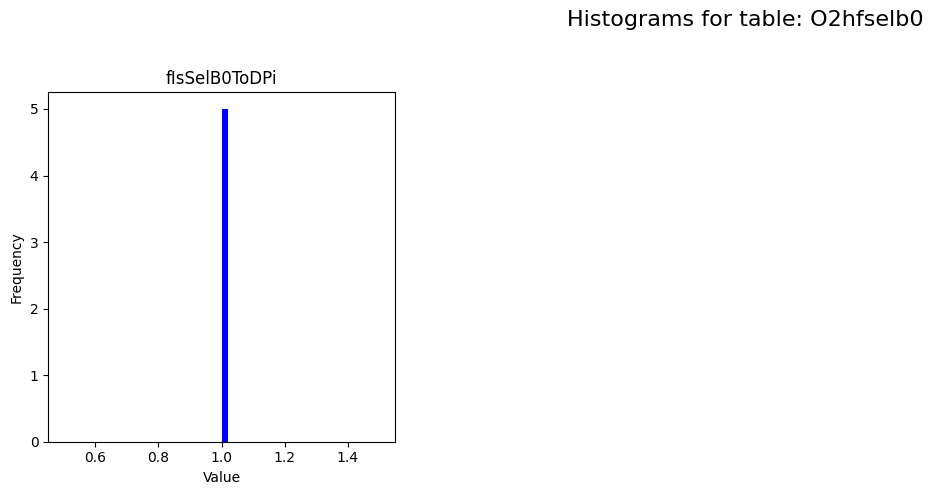

Reading DF_2365371852339552/O2hfmlb0;1

Table: O2hfmlb0
Number of entries: 0
Columns: ['fMlProbB0ToDPi']
Plotting fMlProbB0ToDPi


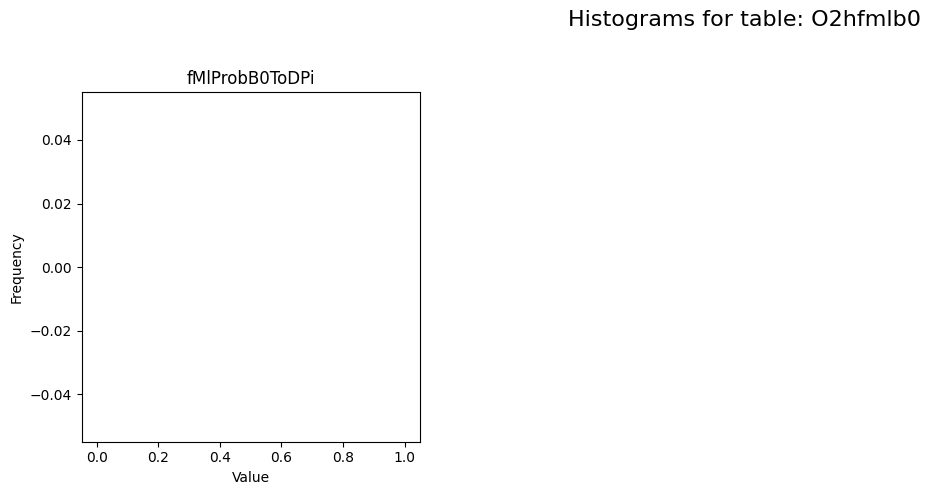

Reading DF_2365371852339552/O2hfredcandb0lite;1

Table: O2hfredcandb0lite
Number of entries: 5
Columns: ['fM', 'fPt', 'fEta', 'fPhi', 'fY', 'fCpa', 'fCpaXY', 'fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised', 'fDecayLengthXYNormalised', 'fImpactParameterProduct', 'fMaxNormalisedDeltaIP', 'fMlScoreSig', 'fIsSelB0ToDPi', 'fMD', 'fPtD', 'fDecayLengthD', 'fDecayLengthXYD', 'fImpactParameterD', 'fPtDmesProngMin', 'fAbsEtaDmesProngMin', 'fItsNClsDmesProngMin', 'fTpcNClsCrossedRowsDmesProngMin', 'fTpcChi2NClDmesProngMax', 'fNSigTpcPiDmesProng0', 'fNSigTofPiDmesProng0', 'fNSigTpcTofPiDmesProng0', 'fNSigTpcKaDmesProng1', 'fNSigTofKaDmesProng1', 'fNSigTpcTofKaDmesProng1', 'fNSigTpcPiDmesProng2', 'fNSigTofPiDmesProng2', 'fNSigTpcTofPiDmesProng2', 'fProng0MlScoreBkg', 'fProng0MlScorePrompt', 'fProng0MlScoreNonprompt', 'fPtBach', 'fAbsEtaBach', 'fItsNClsBach', 'fTpcNClsCrossedRowsBach', 'fTpcChi2NClBach', 'fImpactParameterBach', 'fNSigTpcPiBachelor', 'fNSigTofPiBachelor', 'fNSi

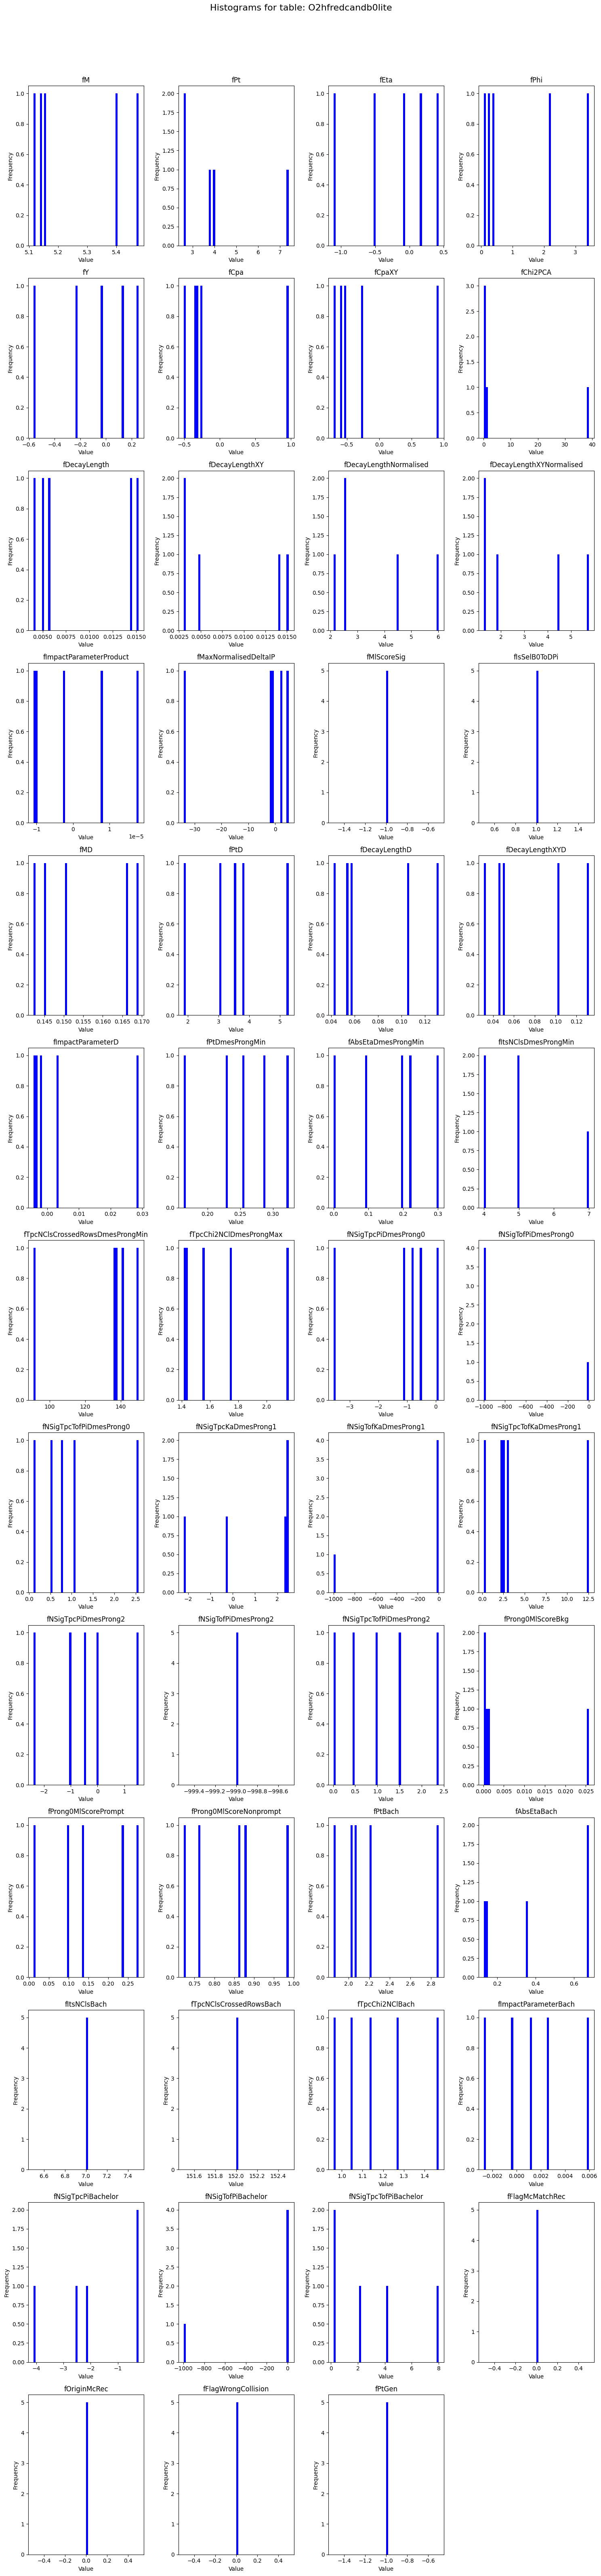

In [2]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

tables = [
    "O2hfcandb0base",
    "O2hfredb0prong",
    "O2hfredb0prongdst",
    "O2hfredb0softpi",
    "O2hfredb0dpml",
    "O2hfselb0",
    "O2hfmlb0",
    "O2hfredcandb0lite",
    # "O2hfredb0mccheck",
]

# with uproot.open("Tree.root") as f:
with uproot.open("Tree_hytest.root.root") as f:
    keys = f.keys()
    print("ROOT Keys:", keys)
    
    for table in tables:
        # Filter keys that match the table name
        matched_keys = [key for key in keys if f"{table};" in key]
        
        if not matched_keys:
            print(f"No keys found for table: {table}")
            continue
        
        dfs = []
        for key in matched_keys:
            print(f"Reading {key}")
            df = f[key].arrays(library="pd")
            dfs.append(df)
        
        full_df = pd.concat(dfs, ignore_index=True)
        print(f"\nTable: {table}")
        print(f"Number of entries: {len(full_df)}")
        print(f"Columns: {full_df.columns.tolist()}")
        
        # Plotting
        n_columns = len(full_df.columns)
        n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)
        
        fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
        axes = axes.flatten()

        for i, column in enumerate(full_df.columns):
            print(f"Plotting {column}")
            try:
                axes[i].hist(full_df[column].dropna(), bins=50, color='blue')
                axes[i].set_title(f'{column}')
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Frequency')
            except Exception as e:
                print(f"Could not plot column {column}: {e}")
                axes[i].set_visible(False)
        
        # Remove unused axes if any
        for i in range(n_columns, len(axes)):
            fig.delaxes(axes[i])
        
        fig.suptitle(f"Histograms for table: {table}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
